# GOAL OF THE PROJECT 

White House Finance Company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer
first apply for home loan after that company validates the customer eligibility for loan. The company wants to automate
the loan eligibiity process based on customer details provided while filling the application form.
So I have attempted to prepare a project where the model can predict the loan approval and hence cana accelerate 
the decision making process  for determining whether an applicant is eligible for a loan or not. 

# The machine learning models used in this project are--

In [1]:
#---Logistic Regression
#---RandomForest Classifier
#---Support Vector Classifier
#---RandomForestClassifier (RandomizedSearchCV)
#---RandomForestClassifier (GridSearchCV)
#---Decision Tree(GridSearchCV)
#---Logistic Regression(GridSearchCV)
#---Support Vector Classifier (GridSearchCV)

# DataSet Description

In [ ]:
#LoanID - Loan Reference ID (Unique)
#Gender - Applicant Gender (M ale or Female)
#Married - Applicant marital status  (Married or not married )
#Dependents - Number of family members - 0; 1; 2; 3+
#Education - Applicant educational qualification (graduate or not graduate)
#Self_Employed - Applicant employment status
#ApplicantIncome- Applicant's monthly salary/income
#CoapplicantIncome - Additional applicant's monthly salary
#LoanAmount - Loan amount taken 
#Loan_Amount_Term - The loan's repayment period (in days)
#Credit_History - Records of previous credit history (0: bad credit history, 1: good credit history)
#Property_Area - The location of the property (Rural/Semiurban/Urban)
#Loan_Status -- Status of loan whether approved or not

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_train = pd.read_csv('loan_train_data.csv')
loan_test = pd.read_csv("loan_test_data.csv")

In [3]:
loan_dataset = pd.concat((loan_train, loan_test)) #concating train and test data

In [4]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_dataset=loan_dataset.drop(columns= ['Loan_ID'], axis= 1)

In [6]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [7]:
loan_dataset.describe() #statistical representaton of numerical columns

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [325]:
loan_dataset.isnull().mean()*100 #finding the missing values 

Gender                2.446483
Married               0.305810
Dependents            2.548420
Education             0.000000
Self_Employed         5.606524
ApplicantIncome       0.000000
CoapplicantIncome     0.000000
LoanAmount            2.752294
Loan_Amount_Term      2.038736
Credit_History        8.053007
Property_Area         0.000000
Loan_Status          37.410805
dtype: float64

<AxesSubplot:>

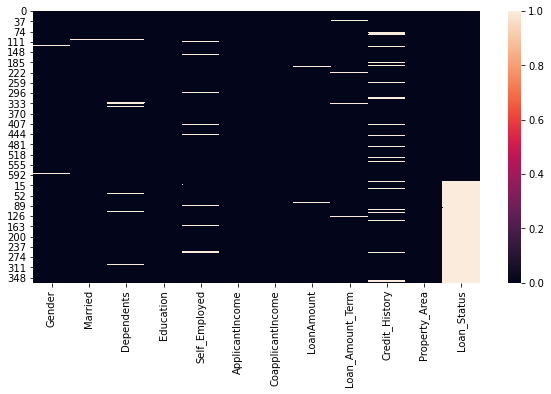

In [326]:
plt.figure(figsize = (10,5))
sns.heatmap(loan_dataset.isnull())

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis------Categorical Variables

In [327]:
cat_vars = [var for var in loan_dataset if loan_dataset[var].dtype == 'object']

In [328]:
cat_vars

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

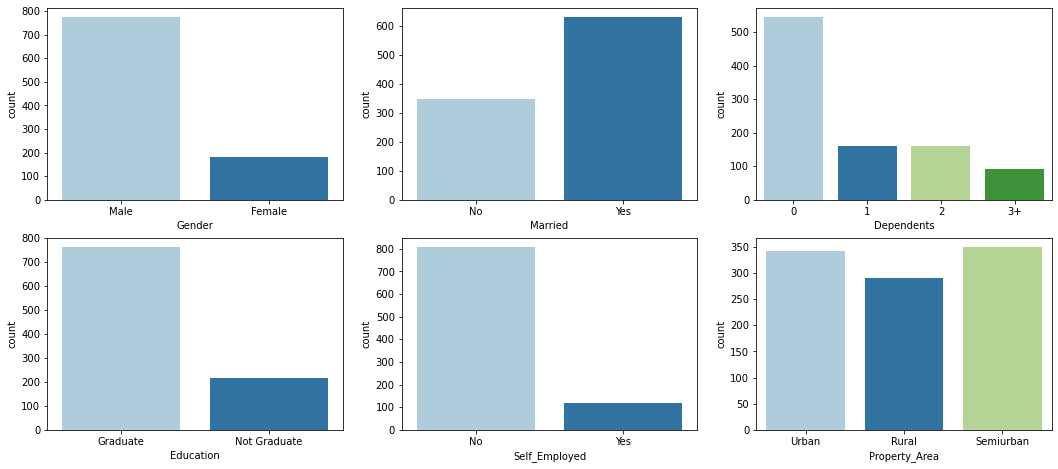

In [329]:
plt.figure(figsize = (18, 12))
plt.subplot(3,3,1)
sns.countplot(x = 'Gender', data = loan_dataset , palette = 'Paired' )

plt.subplot(3,3,2)
sns.countplot(x = 'Married', data = loan_dataset , palette = 'Paired')

plt.subplot(3,3,3)
sns.countplot(x = 'Dependents', data = loan_dataset , palette = 'Paired')
 
plt.subplot(3,3,4)
sns.countplot(x = 'Education', data = loan_dataset , palette = 'Paired')

plt.subplot(3,3,5)
sns.countplot(x = 'Self_Employed', data = loan_dataset , palette = 'Paired')
 
plt.subplot(3,3,6)
sns.countplot(x = 'Property_Area', data = loan_dataset , palette = 'Paired')

In [330]:
#From the above we can conclude that:

#Gender - The number of male applicants are much more higher than female applicants.
#Married - The number of married applicants are much more higher than not married applicants.
#Dependents - The number of applicants is higher in case of those people who have no dependents.
#Self-Employed - Loan applicants in case of not self employed are higher that those who are self-employed.
#Eductaion - Graduate aplicants are higher than non-graduate applicants.
#Property- Area - Urban under property area got the maximum loan approval.

<AxesSubplot:ylabel='Loan_Status'>

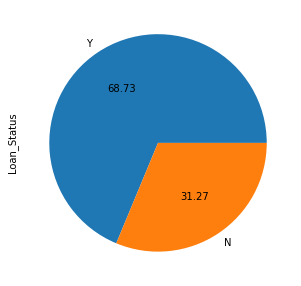

In [331]:
plt.figure(figsize = (8,5))
loan_dataset['Loan_Status'].value_counts().plot(kind = 'pie', autopct = '%.2f')

From the above we can conclude that the number of loan approved is much more higher than not approved. And also the data is imbalanced.

Numerical Variables

In [332]:
num_vars = loan_dataset.select_dtypes(include = ['int64', 'float64'])

In [333]:
num_vars.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

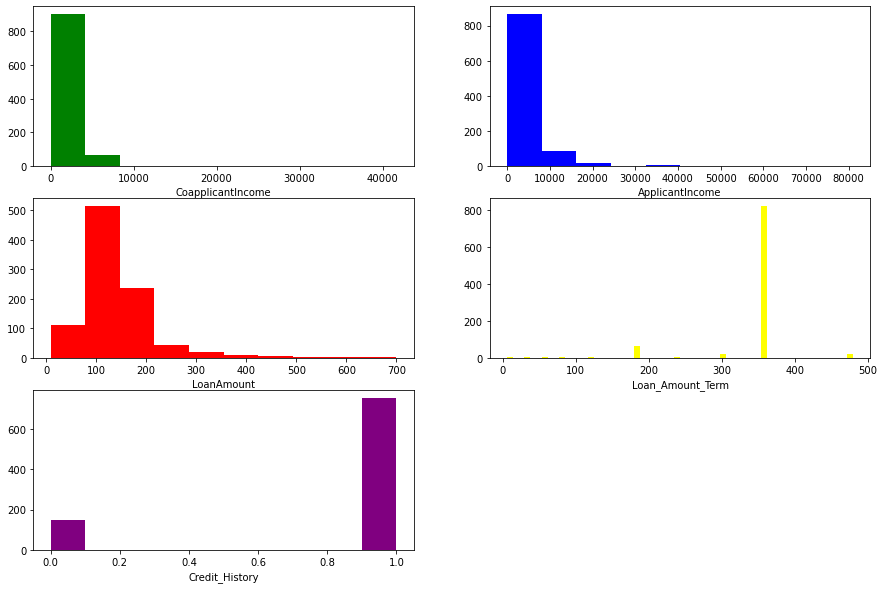

In [334]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
plt.hist(loan_dataset['CoapplicantIncome'], color= 'green')
plt.xlabel("CoapplicantIncome")


plt.subplot(3,2,2)
plt.hist(loan_dataset['ApplicantIncome'], color = 'blue')
plt.xlabel("ApplicantIncome")



plt.subplot(3,2,3)
plt.hist(loan_dataset['LoanAmount'], color = 'red') 
plt.xlabel("LoanAmount") 


plt.subplot(3,2,4)
plt.hist(loan_dataset['Loan_Amount_Term'], bins = 60, color = 'yellow') 
plt.xlabel("Loan_Amount_Term")


plt.subplot(3,2,5)
plt.hist(loan_dataset['Credit_History'], color = 'purple') 
plt.xlabel("Credit_History")

plt.show()

From the above we can conclude that:

Applicants income, Co-applicants Income and Loan Amount are rightly skewed. 360 days loan duration is the most popular compared to the other loan term. The number of applicants that have good credit history is higher compared to applicants that have bad credit history.

C:\anaconnda\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconnda\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconnda\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconnda\New folder\lib\site-p

<AxesSubplot:xlabel='Loan_Amount_Term'>

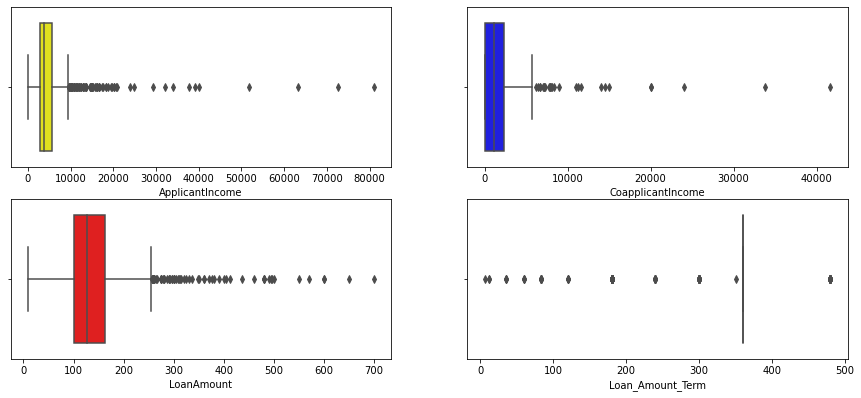

In [335]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.boxplot(loan_dataset['ApplicantIncome'], color = 'yellow')

plt.subplot(3,2,2)
sns.boxplot(loan_dataset['CoapplicantIncome'], color = 'blue')

plt.subplot(3,2,3)
sns.boxplot(loan_dataset['LoanAmount'], color = 'red')

plt.subplot(3,2,4)
sns.boxplot(loan_dataset['Loan_Amount_Term'], color = 'red')



Hence we can conclude that ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term all have outliers

# Bivariate Analysis/ Multivariate Analysis

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

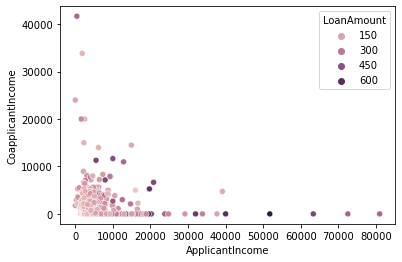

In [336]:
sns.scatterplot(x = loan_dataset['ApplicantIncome'], y = loan_dataset['CoapplicantIncome'], hue = loan_dataset['LoanAmount'])

From the above visualization we conclude that there is a positive relationship between ApplicantIncome, Co-ApplicantIncome and LoanAmount
and loan amount is higher in case of applicant income

<AxesSubplot:xlabel='Loan_Status', ylabel='Property_Area'>

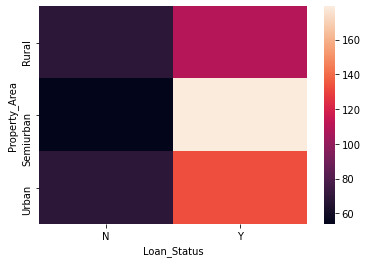

In [339]:
sns.heatmap(pd.crosstab(loan_dataset['Property_Area'], loan_dataset['Loan_Status']))

Loan Approved in case of semi-urban is higher as compared to other property_areas

<AxesSubplot:xlabel='Gender'>

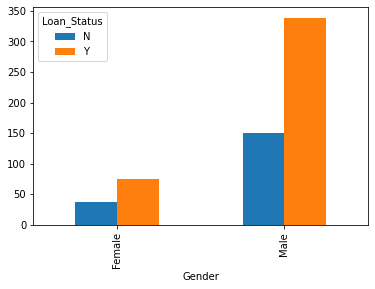

In [340]:
pd.crosstab(loan_dataset['Gender'],loan_dataset['Loan_Status']).plot(kind = 'bar')

Male got much more loan approvals than female

In [341]:
pd.crosstab(loan_dataset['Education'], loan_dataset['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


So we can conclude that graduates have got the maximum number of loan approvals.

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

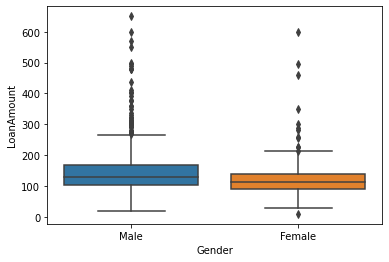

In [344]:
sns.boxplot(x = loan_dataset['Gender'], y= loan_dataset['LoanAmount'])

From the above observation we can conclude that men have more outliers as compared to female

<AxesSubplot:xlabel='Education'>

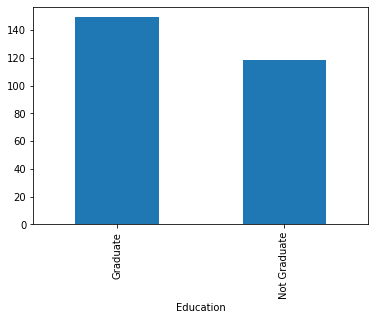

In [345]:
(loan_dataset.groupby('Education').mean()['LoanAmount']).plot(kind= 'bar')

Loan Amount in case of Graduates are much more higher than Not Graduate.

<AxesSubplot:xlabel='Credit_History'>

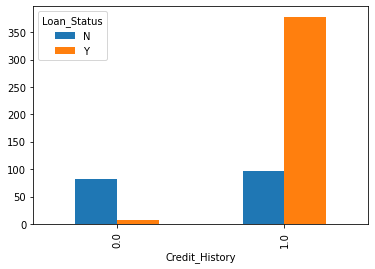

In [421]:
pd.crosstab(loan_dataset['Credit_History'],loan_dataset['Loan_Status']).plot(kind = 'bar')

It seems people with credit history as 1 are more likely to get the loans approved

<AxesSubplot:>

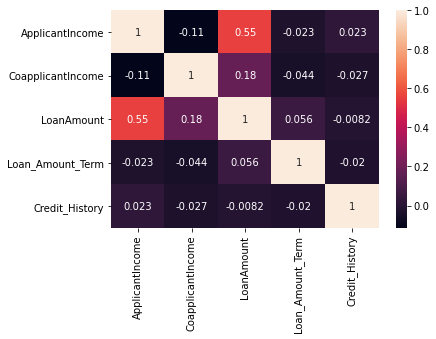

In [419]:
#correlation plot
sns.heatmap(loan_dataset.corr(), annot = True)

# Outliers Detection

C:\anaconnda\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconnda\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconnda\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconnda\New folder\lib\site-p

<AxesSubplot:xlabel='Loan_Amount_Term'>

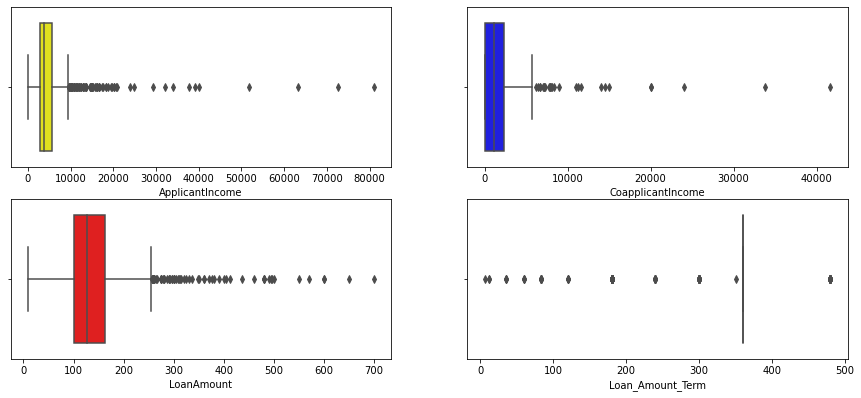

In [422]:
plt.figure(figsize = (15,10))

plt.subplot(3,2,1)
sns.boxplot(loan_dataset['ApplicantIncome'], color = 'yellow')

plt.subplot(3,2,2)
sns.boxplot(loan_dataset['CoapplicantIncome'], color = 'blue')

plt.subplot(3,2,3)
sns.boxplot(loan_dataset['LoanAmount'], color = 'red')

plt.subplot(3,2,4)
sns.boxplot(loan_dataset['Loan_Amount_Term'], color = 'red')

7.086961153594506

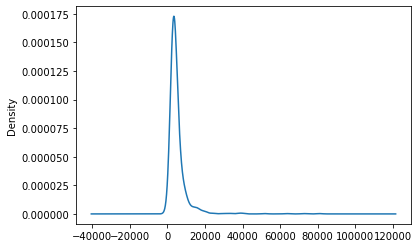

In [423]:
loan_dataset['ApplicantIncome'].plot(kind= 'kde')
loan_dataset['ApplicantIncome'].skew()

6.844108581480271

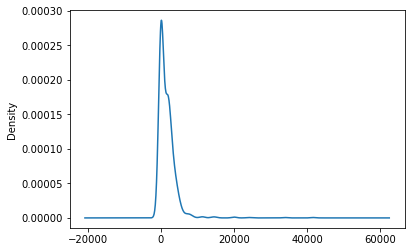

In [424]:
loan_dataset['CoapplicantIncome'].plot(kind= 'kde')
loan_dataset['CoapplicantIncome'].skew()

2.714035799071379

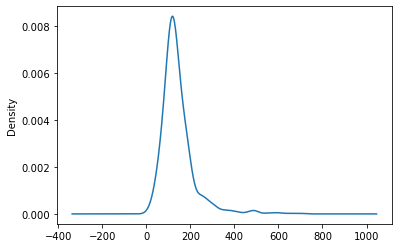

In [425]:
loan_dataset['LoanAmount'].plot(kind= 'kde')
loan_dataset['LoanAmount'].skew()

-2.4773920561371465

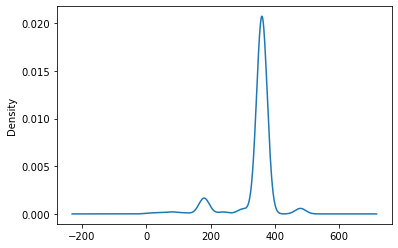

In [426]:
loan_dataset['Loan_Amount_Term'].plot(kind= 'kde')
loan_dataset['Loan_Amount_Term'].skew()

# Outliers Removal

In [427]:
loan_dataset1 = loan_dataset.copy()

In [428]:
def iqr_capping(df, cols, factor): #factor = 1.5 iqr value
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        
        iqr = q3 - q1 
        upper_limit = q3 + (factor*iqr)
        lower_limit = q1 - (factor*iqr)
        
        df[col]=  np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit, lower_limit, df[col]))

In [429]:
features = loan_dataset1.select_dtypes(include=["int64", "float64"])

In [430]:
iqr_capping(loan_dataset1, features, 1.5)

In [431]:
loan_dataset1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.0,902.0
mean,4466.308869,1423.644159,135.495807,360.0,1.0
std,2268.305740,1619.356444,53.201694,0.0,0.0
min,0.000000,0.000000,9.000000,360.0,1.0
25%,2875.000000,0.000000,100.000000,360.0,1.0
50%,3800.000000,1110.000000,126.000000,360.0,1.0
75%,5516.000000,2365.000000,162.000000,360.0,1.0
max,9477.500000,5912.500000,255.000000,360.0,1.0


In [432]:
loan_dataset1['LoanAmount'].fillna(loan_dataset1['LoanAmount'].mean(), inplace = True) #filling the missing values with mean

In [19]:
loan_dataset1['Loan_Amount_Term'].fillna(loan_dataset1['Loan_Amount_Term'].mean(), inplace =  True)

In [20]:
loan_dataset1['Credit_History'].fillna(loan_dataset1['Credit_History'].mean(), inplace = True)

In [21]:
loan_dataset1['Gender'].fillna(loan_dataset1['Gender'].mode()[0], inplace = True) # filling the missing values with most frequent
loan_dataset1['Married'].fillna(loan_dataset1['Married'].mode()[0],inplace = True)
loan_dataset1['Dependents'].fillna(loan_dataset1['Dependents'].mode()[0],inplace = True)
loan_dataset1['Self_Employed'].fillna(loan_dataset1['Self_Employed'].mode()[0],inplace = True)
loan_dataset1['Loan_Status'].fillna(loan_dataset1['Loan_Status'].mode()[0],inplace = True)

In [22]:
loan_dataset1.isnull().sum().sum()

0

# SKEWNESS TRANSFORMATION

In [23]:
loan_dataset1['CoapplicantIncome_sqr'] = np.sqrt(loan_dataset1['CoapplicantIncome'])

0.18282095276804733

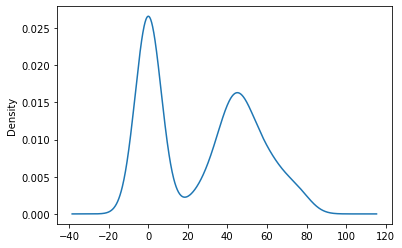

In [24]:
loan_dataset1['CoapplicantIncome_sqr'].plot(kind = 'kde')
loan_dataset1['CoapplicantIncome_sqr'].skew()

In [25]:
loan_dataset1['LoanAmount_sqr'] = np.sqrt(loan_dataset1['LoanAmount'])

0.02102212028268656


<AxesSubplot:ylabel='Density'>

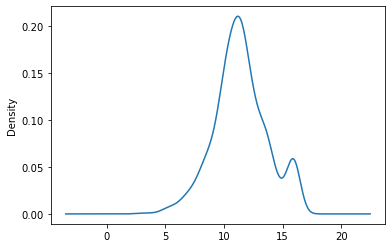

In [26]:
print(loan_dataset1['LoanAmount_sqr'].skew())
loan_dataset1['LoanAmount_sqr'].plot(kind = 'kde')

In [27]:
loan_dataset1['Loan_Amount_Term_log'] = np.log(loan_dataset1['Loan_Amount_Term'])

0


<AxesSubplot:ylabel='Frequency'>

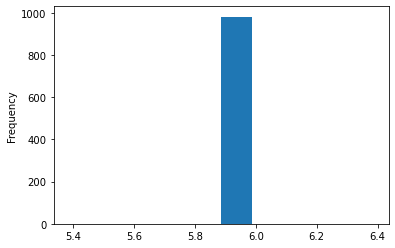

In [28]:
print(loan_dataset1['Loan_Amount_Term_log'].skew())
loan_dataset1['Loan_Amount_Term_log'].plot(kind= 'hist')

0


<AxesSubplot:ylabel='Frequency'>

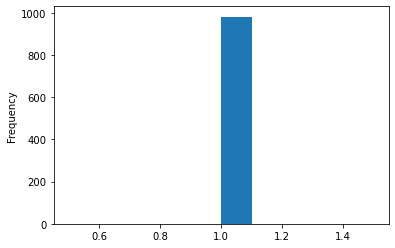

In [29]:
print(loan_dataset1['Credit_History'].skew())
loan_dataset1['Credit_History'].plot(kind = 'hist')

In [30]:
loan_dataset1['ApplicantIncome_sqr'] = np.sqrt(loan_dataset1['ApplicantIncome'])

0.3703790563986101


<AxesSubplot:ylabel='Density'>

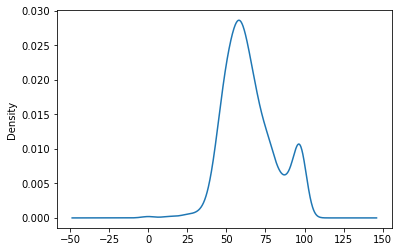

In [31]:
print(loan_dataset1['ApplicantIncome_sqr'].skew())
loan_dataset1['ApplicantIncome_sqr'].plot(kind = 'kde')

In [32]:
loan_dataset1 = loan_dataset1.drop(columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History','Loan_Amount_Term'], axis=1)

In [33]:
loan_dataset1.describe() # outliers removed

,CoapplicantIncome_sqr,LoanAmount_sqr,Loan_Amount_Term_log,ApplicantIncome_sqr
count,981.000000,981.000000,9.810000e+02,981.000000
mean,27.266475,11.417381,5.886104e+00,64.767341
std,26.093630,2.268143,6.931325e-14,16.485674
min,0.000000,3.000000,5.886104e+00,0.000000
25%,0.000000,10.049876,5.886104e+00,53.619026
50%,33.316662,11.313708,5.886104e+00,61.644140
75%,48.631266,12.649111,5.886104e+00,74.269779
max,76.892782,15.968719,5.886104e+00,97.352452


In [34]:
loan_dataset1['Loan_Status'].value_counts()

Y    789
N    192
Name: Loan_Status, dtype: int64

In [35]:
!pip install imblearn

In [36]:
X = loan_dataset1.drop(columns= ['Loan_Status'], axis=1)
y = loan_dataset1['Loan_Status']

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size= 0.20, random_state =0)


In [191]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,CoapplicantIncome_sqr,LoanAmount_sqr,Loan_Amount_Term_log,ApplicantIncome_sqr
158,Male,No,0,Graduate,No,Rural,45.639895,10.954451,5.886104,54.589376
154,Male,No,0,Graduate,No,Urban,0.000000,7.071068,5.886104,57.043843
40,Male,No,0,Graduate,No,Urban,0.000000,8.944272,5.886104,60.000000
304,Male,No,0,Graduate,No,Rural,50.000000,11.832160,5.886104,63.245553
196,Male,Yes,1,Graduate,No,Semiurban,0.000000,10.677078,5.886104,69.253159


In [192]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,CoapplicantIncome_sqr,LoanAmount_sqr,Loan_Amount_Term_log,ApplicantIncome_sqr
474,Male,No,2,Graduate,No,Rural,68.176242,12.727922,5.886104,74.377416
236,Male,Yes,0,Graduate,No,Urban,0.000000,15.968719,5.886104,75.802375
27,Male,Yes,2,Not Graduate,No,Urban,32.249031,10.488088,5.886104,65.007692
8,Male,Yes,2,Graduate,No,Urban,0.000000,15.968719,5.886104,97.352452
94,Male,Yes,1,Graduate,No,Semiurban,48.301139,11.090537,5.886104,67.889616


In [193]:
from imblearn.over_sampling import RandomOverSampler # resampling of data

In [194]:
os = RandomOverSampler(0.5)

C:\anaconnda\New folder\lib\site-packages\imblearn\utils\_validation.py:586: FutureWarning: Pass sampling_strategy=0.5 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [195]:
X_train_res, y_train_res = os.fit_resample(X_train,y_train)

In [196]:
X_train_res.shape, y_train_res.shape

((937, 10), (937,))

In [197]:
# data have been resampled with ratio = 0.50
from collections import Counter
print("original dataset shape {}". format(Counter(y_train)))
print("resampled dataset shape{}".format(Counter(y_train_res)))

original dataset shape Counter({'Y': 625, 'N': 159})
resampled dataset shapeCounter({'Y': 625, 'N': 312})


In [198]:
#Data Preprocessing -- applying one hot encoding in categorical variables and label encoder in dependent variables for better results.
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [199]:
transformer = ColumnTransformer(transformers= [
    ('tnf1', OneHotEncoder(drop = 'first', dtype = np.int32, sparse = False), ['Gender','Married', 'Dependents', 'Education',
                                                             'Self_Employed', 'Property_Area'])
       
], remainder = 'passthrough')

In [200]:
X_train_new=transformer.fit_transform(X_train_res)
X_train_new

array([[ 1.        ,  0.        ,  0.        , ..., 10.95445115,
         5.88610403, 54.58937626],
       [ 1.        ,  0.        ,  0.        , ...,  7.07106781,
         5.88610403, 57.04384279],
       [ 1.        ,  0.        ,  0.        , ...,  8.94427191,
         5.88610403, 60.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 11.61895004,
         5.88610403, 58.46366393],
       [ 1.        ,  0.        ,  0.        , ..., 10.67707825,
         5.88610403, 43.0464865 ],
       [ 1.        ,  1.        ,  0.        , ..., 12.24744871,
         5.88610403, 80.03749122]])

In [201]:
X_test_new= transformer.transform(X_test)
X_test_new

array([[ 1.        ,  0.        ,  0.        , ..., 12.72792206,
         5.88610403, 74.37741593],
       [ 1.        ,  1.        ,  0.        , ..., 15.96871942,
         5.88610403, 75.80237463],
       [ 1.        ,  1.        ,  0.        , ..., 10.48808848,
         5.88610403, 65.00769185],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., 11.48912529,
         5.88610403, 58.23229345],
       [ 1.        ,  1.        ,  0.        , ..., 13.56465997,
         5.88610403, 54.72659317],
       [ 1.        ,  0.        ,  0.        , ..., 10.53565375,
         5.88610403, 54.10175598]])

In [202]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [203]:
y_train = le.fit_transform(y_train_res)

In [204]:
y_test = le.fit_transform(y_test)

In [205]:
#feature scaling using standard scaler
from sklearn.preprocessing import StandardScaler
Sc =  StandardScaler()

In [206]:
X_train_scale = Sc.fit_transform(X_train_new)
X_test_scale = Sc.transform(X_test_new)

# MODEL BUILDING

# 1.LOGISTIC REGRESSION

In [207]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [378]:
Lr = LogisticRegression(solver= 'saga')

In [379]:
Lr.fit(X_train_scale, y_train)

LogisticRegression(solver='saga')

In [380]:
y_pred_lr = Lr.predict(X_test_scale)

In [381]:
print(print(confusion_matrix(y_test, y_pred_lr)))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_lr)*100))
print(classification_report(y_test, y_pred_lr))

[[  1  32]
 [  2 162]]
None
Accuracy score 82.74111675126903
              precision    recall  f1-score   support

           0       0.33      0.03      0.06        33
           1       0.84      0.99      0.91       164

    accuracy                           0.83       197
   macro avg       0.58      0.51      0.48       197
weighted avg       0.75      0.83      0.76       197



# 2.RANDOM FOREST CLASSIFIER

In [212]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 400, max_depth = 6,criterion = 'entropy')

In [213]:
RF.fit(X_train_scale, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=400)

In [215]:
y_pred_rf = RF.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred_rf))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_rf)*100))
print('classification report {}'.format(classification_report(y_test, y_pred_rf)))

[[  0  33]
 [  2 162]]
Accuracy score 82.23350253807106
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.83      0.99      0.90       164

    accuracy                           0.82       197
   macro avg       0.42      0.49      0.45       197
weighted avg       0.69      0.82      0.75       197



# 3.SUPPORT VECTOR CLASSIFIER (SVC)

In [216]:
from sklearn.svm import SVC

In [217]:
classifier = SVC(kernel='rbf')
classifier.fit(X_train_scale,y_train)

SVC()

In [218]:
y_pred_svc = classifier.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred_svc))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_svc)*100))
print('classification report {}'.format(classification_report(y_test, y_pred_svc)))

[[  1  32]
 [  6 158]]
Accuracy score 80.71065989847716
classification report               precision    recall  f1-score   support

           0       0.14      0.03      0.05        33
           1       0.83      0.96      0.89       164

    accuracy                           0.81       197
   macro avg       0.49      0.50      0.47       197
weighted avg       0.72      0.81      0.75       197



In [219]:
from sklearn.model_selection import cross_val_score
scores1 = print(cross_val_score(RF, X_train_scale, y_train, cv = 10).mean())
scores2 = print(cross_val_score(Lr, X_train_scale, y_train, cv = 10).mean())
scores2 = print(cross_val_score(classifier, X_train_scale, y_train, cv = 10).mean())

0.7086593456874858
0.6648821779913063
0.6947037291237704


# HYPER-PARAMETER TUNNING

# 4.RANDOMFOREST CLASSIFIER (using RandomizedSearchCV )

In [220]:
from sklearn.model_selection import RandomizedSearchCV

In [221]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num=100)]

#measuring the quality of a split
criterion = ['gini', 'entropy']

#maximum depth of the tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

#minimum number of samples required to split a node
min_samples_split= [0.25,0.5,1.0] 

#minimum number of samples required to be at a leaf node
min_samples_leaf = [5,10,15,20,30] 

#number of features to consider
max_features = ['sqrt','log2', None]

#the number of samples to draw from X 
max_samples = [0.5,0.75,1.0,None] 

# controlling max leaf nodes
max_leaf_nodes = [5,10,15,25,35,55,None]


In [222]:
#creating random grid
random_grid = {'n_estimators': n_estimators,
              'criterion': criterion, 
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
              'max_features': max_features,
              'max_samples': max_samples,
               'max_leaf_nodes' : max_leaf_nodes,
              }
print(random_grid)

{'n_estimators': [100, 109, 118, 127, 136, 145, 154, 163, 172, 181, 190, 200, 209, 218, 227, 236, 245, 254, 263, 272, 281, 290, 300, 309, 318, 327, 336, 345, 354, 363, 372, 381, 390, 400, 409, 418, 427, 436, 445, 454, 463, 472, 481, 490, 500, 509, 518, 527, 536, 545, 554, 563, 572, 581, 590, 600, 609, 618, 627, 636, 645, 654, 663, 672, 681, 690, 700, 709, 718, 727, 736, 745, 754, 763, 772, 781, 790, 800, 809, 818, 827, 836, 845, 854, 863, 872, 881, 890, 900, 909, 918, 927, 936, 945, 954, 963, 972, 981, 990, 1000], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [0.25, 0.5, 1.0], 'min_samples_leaf': [5, 10, 15, 20, 30], 'max_features': ['sqrt', 'log2', None], 'max_samples': [0.5, 0.75, 1.0, None], 'max_leaf_nodes': [5, 10, 15, 25, 35, 55, None]}


In [223]:
rf = RandomForestClassifier()

In [224]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv= 3, verbose =2, random_state = 50,
                              n_jobs= -1, error_score='raise')

In [225]:
rf_random.fit(X_train_scale, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_leaf_nodes': [5, 10, 15, 25, 35,
                                                           55, None],
                                        'max_samples': [0.5, 0.75, 1.0, None],
                                        'min_samples_leaf': [5, 10, 15, 20, 30],
                                        'min_samples_split': [0.25, 0.5, 1.0],
                                        'n_estimators': [100, 109, 118, 127,
                                                         136, 145, 154, 163,
                          

In [226]:
best_random_grid=rf_random.best_params_
best_random_grid

{'n_estimators': 827,
 'min_samples_split': 0.25,
 'min_samples_leaf': 5,
 'max_samples': 0.5,
 'max_leaf_nodes': 10,
 'max_features': None,
 'max_depth': 50,
 'criterion': 'entropy'}

In [227]:
rf_random.best_score_

0.669154993036782

In [228]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred_random = rf_random.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred_random))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_random)*100))
print('classification report {}'.format(classification_report(y_test, y_pred_random)))

[[  0  33]
 [  0 164]]
Accuracy score 83.24873096446701
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.83      1.00      0.91       164

    accuracy                           0.83       197
   macro avg       0.42      0.50      0.45       197
weighted avg       0.69      0.83      0.76       197



C:\anaconnda\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconnda\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconnda\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4.RANDOMFOREST CLASSIFIER (using  GRIDSEARCHCV)

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
param_grid = { 'criterion' : [rf_random.best_params_['criterion']],
              'max_depth' : [rf_random.best_params_['max_depth']],
              'min_samples_split' : [rf_random.best_params_['min_samples_split']],
            'min_samples_leaf' : [1,2,5,7,10],
              'max_leaf_nodes' : [15,25,35,None],
              'max_features' : [rf_random.best_params_['max_features']],
              'max_samples' : [rf_random.best_params_['max_samples']],
              'n_estimators' : [rf_random.best_params_['n_estimators'],rf_random.best_params_['n_estimators']-100,
                               rf_random.best_params_['n_estimators']+300,rf_random.best_params_['n_estimators']+200],
              'bootstrap' : ['True', 'False']
              
               }
print(param_grid)

{'criterion': ['entropy'], 'max_depth': [50], 'min_samples_split': [0.25], 'min_samples_leaf': [1, 2, 5, 7, 10], 'max_leaf_nodes': [15, 25, 35, None], 'max_features': [None], 'max_samples': [0.5], 'n_estimators': [827, 727, 1127, 1027], 'bootstrap': ['True', 'False']}


In [231]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv= 3, n_jobs= -1,verbose=2)
grid_search.fit(X_train_scale,y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'criterion': ['entropy'], 'max_depth': [50],
                         'max_features': [None],
                         'max_leaf_nodes': [15, 25, 35, None],
                         'max_samples': [0.5],
                         'min_samples_leaf': [1, 2, 5, 7, 10],
                         'min_samples_split': [0.25],
                         'n_estimators': [827, 727, 1127, 1027]},
             verbose=2)

In [232]:
best_grid = grid_search.best_params_
best_grid

{'bootstrap': 'True',
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': None,
 'max_leaf_nodes': 25,
 'max_samples': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 0.25,
 'n_estimators': 727}

In [233]:
grid_search.best_score_

0.6702233691051583

In [234]:
y_pred_grid = grid_search.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred_grid))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_grid)*100))
print('classification report {}'.format(classification_report(y_test, y_pred_grid)))

[[  0  33]
 [  0 164]]
Accuracy score 83.24873096446701
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        33
           1       0.83      1.00      0.91       164

    accuracy                           0.83       197
   macro avg       0.42      0.50      0.45       197
weighted avg       0.69      0.83      0.76       197



C:\anaconnda\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconnda\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconnda\New folder\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5.DecisionTree

In [411]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion = "entropy", max_depth=8)
decision_tree = DT.fit(X_train_scale, y_train)

In [412]:
decision_tree_pred = decision_tree.predict(X_test_scale)

In [413]:
print(confusion_matrix(y_test, decision_tree_pred))
print('Accuracy score {}'.format(accuracy_score(y_test,decision_tree_pred)*100))
print('classification report {}'.format(classification_report(y_test,decision_tree_pred)))

[[  7  26]
 [ 18 146]]
Accuracy score 77.66497461928934
classification report               precision    recall  f1-score   support

           0       0.28      0.21      0.24        33
           1       0.85      0.89      0.87       164

    accuracy                           0.78       197
   macro avg       0.56      0.55      0.56       197
weighted avg       0.75      0.78      0.76       197



# 6.DECISIONTREE (using GRID SEARCH)

In [406]:
param_grid =  { 'criterion' : ["gini", "entropy"], 
                'splitter' : ["best", "random"],
               'max_depth' : [5,7,10,12,15,20],
               'min_samples_split' : [0.25,0.5,1.0], 
               'min_samples_leaf' : [5,10,15,25,30,35,50],
             'max_features' : ['auto','sqrt','log2',None]
               
              }
print(param_grid)

{'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [5, 7, 10, 12, 15, 20], 'min_samples_split': [0.25, 0.5, 1.0], 'min_samples_leaf': [5, 10, 15, 25, 30, 35, 50], 'max_features': ['auto', 'sqrt', 'log2', None]}


In [407]:
DT =  DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = DT, param_grid = param_grid, cv= 3 , n_jobs= -1,verbose=2)
grid_search.fit(X_train_scale,y_train)

Fitting 3 folds for each of 2016 candidates, totalling 6048 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 7, 10, 12, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [5, 10, 15, 25, 30, 35, 50],
                         'min_samples_split': [0.25, 0.5, 1.0],
                         'splitter': ['best', 'random']},
             verbose=2)

In [408]:
best_grid = grid_search.best_params_
best_grid

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 0.25,
 'splitter': 'best'}

In [409]:
grid_search.best_score_

0.6830472952677425

In [410]:
y_pred_dt = grid_search.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred_dt))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_dt)*100))
print('classification report {}'.format(classification_report(y_test, y_pred_dt)))

[[  4  29]
 [ 12 152]]
Accuracy score 79.18781725888326
classification report               precision    recall  f1-score   support

           0       0.25      0.12      0.16        33
           1       0.84      0.93      0.88       164

    accuracy                           0.79       197
   macro avg       0.54      0.52      0.52       197
weighted avg       0.74      0.79      0.76       197



# 7.SVM TUNNING

In [289]:
param_grid = { 'kernel' : ['linear', 'rbf', 'poly'],
               'C' : [0.001,0.01,0.1,1,10],
               'tol' : [0.001,0.01, 0.1],
              'max_iter' : [100,1000,2500,5000]
              
             
             
             
            }
print(param_grid)

{'kernel': ['linear', 'rbf', 'poly'], 'C': [0.001, 0.01, 0.1, 1, 10], 'tol': [0.001, 0.01, 0.1], 'max_iter': [100, 1000, 2500, 5000]}


In [290]:
svm_grid = SVC()

In [291]:
svm_gridsearch= GridSearchCV(estimator = svm_grid, param_grid = param_grid, cv= 3 , n_jobs= -1,verbose=2)

In [292]:
svm_gridsearch.fit(X_train_scale,y_train)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


C:\anaconnda\New folder\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'max_iter': [100, 1000, 2500, 5000],
                         'tol': [0.001, 0.01, 0.1]},
             verbose=2)

In [293]:
best_grid1 = svm_gridsearch.best_params_
best_grid1

{'C': 10, 'kernel': 'rbf', 'max_iter': 1000, 'tol': 0.001}

In [294]:
svm_gridsearch.best_score_

0.7310730182135933

In [295]:
y_predsvc= svm_gridsearch.predict(X_test_scale)
print(confusion_matrix(y_test, y_predsvc))
print('Accuracy score {}'.format(accuracy_score(y_test,y_predsvc)*100))
print('classification report {}'.format(classification_report(y_test, y_predsvc)))

[[  2  31]
 [ 20 144]]
Accuracy score 74.11167512690355
classification report               precision    recall  f1-score   support

           0       0.09      0.06      0.07        33
           1       0.82      0.88      0.85       164

    accuracy                           0.74       197
   macro avg       0.46      0.47      0.46       197
weighted avg       0.70      0.74      0.72       197



# 8.Logistic Regression GridSearchCv

In [396]:
param_grid = { 'penalty' : ['l2', 'none'],
               'C' : [0.1,0.01,0.001],
             'solver' : ['sag'],
              'max_iter' : [100,1000,2500,5000],
              'multi_class' : ['auto', 'ovr', 'multinomial'],
              'fit_intercept' : [True],
              'tol' : [0.1,0.01,0.001]
              
             }
print(param_grid)

{'penalty': ['l2', 'none'], 'C': [0.1, 0.01, 0.001], 'solver': ['sag'], 'max_iter': [100, 1000, 2500, 5000], 'multi_class': ['auto', 'ovr', 'multinomial'], 'fit_intercept': [True], 'tol': [0.1, 0.01, 0.001]}


In [397]:
Lr = LogisticRegression()

In [398]:
log_grid = GridSearchCV(estimator = Lr , param_grid = param_grid, cv= 3 , n_jobs= -1,verbose=2)

In [399]:
log_grid.fit(X_train_scale, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 0.01, 0.001], 'fit_intercept': [True],
                         'max_iter': [100, 1000, 2500, 5000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l2', 'none'], 'solver': ['sag'],
                         'tol': [0.1, 0.01, 0.001]},
             verbose=2)

In [400]:
best_logi_grid = log_grid.best_params_
best_logi_grid

{'C': 0.1,
 'fit_intercept': True,
 'max_iter': 5000,
 'multi_class': 'multinomial',
 'penalty': 'l2',
 'solver': 'sag',
 'tol': 0.1}

In [401]:
log_grid.best_score_

0.6787669643100953

In [402]:
y_pred_logi = log_grid.predict(X_test_scale)
print(confusion_matrix(y_test, y_pred_logi))
print('Accuracy score {}'.format(accuracy_score(y_test,y_pred_logi)*100))
print('classification report {}'.format(classification_report(y_test,y_pred_logi)))

[[  1  32]
 [  1 163]]
Accuracy score 83.24873096446701
classification report               precision    recall  f1-score   support

           0       0.50      0.03      0.06        33
           1       0.84      0.99      0.91       164

    accuracy                           0.83       197
   macro avg       0.67      0.51      0.48       197
weighted avg       0.78      0.83      0.77       197



# Conclusion and Interpretation

It can be noticed that our results are comparable and in certain cases the accuracy score has improved.
Our RandomForestClassifier (GridSearchCV) and Logistic Regression using GridSearchCV was one of the best performing 
model with accuracy score of 83.24%. In general, it can be seen that all models can achieve up to 70% accuracy.
 